In [1]:
# load dataset
import pandas as pd
data = pd.read_csv('Customers.csv')
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
29,30,Female,23,29,87
134,135,Male,20,73,5
63,64,Female,54,47,59
26,27,Female,45,28,32
184,185,Female,41,99,39


In [2]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
187,101,68
162,81,5
27,28,61
53,43,60
54,43,45


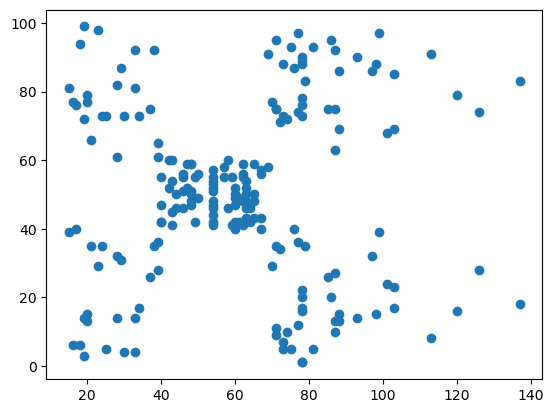

In [3]:
# visualize the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [8]:

# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [9]:
# sum of squares error for K=1 to k=10
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25050.832307547527,
 21826.936303231654,
 19787.670554966855]

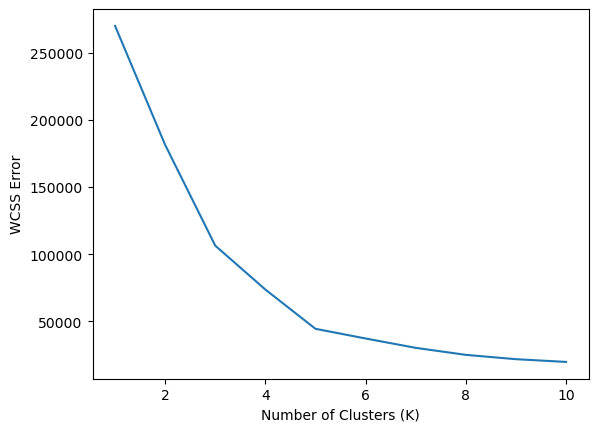

In [10]:
# plot WCSS error corresponding to different K values
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [11]:
# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vihar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# see predicted clusters
pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [13]:
# add cluster column to dataset
data['cluster'] = pred

In [14]:
data.sample(5)

,income,score,cluster
95,60,52,0
29,29,87,3
79,54,42,0
10,19,14,1
98,61,42,0


In [15]:
# centers of clusters
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

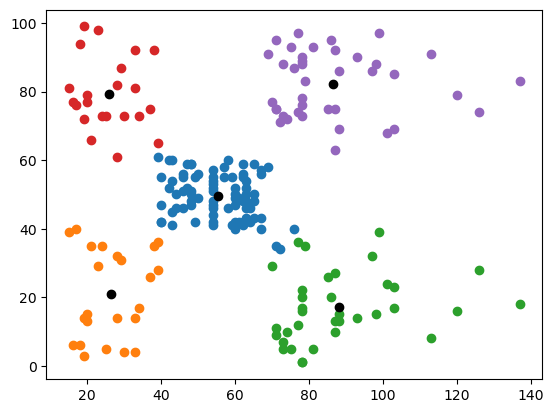

In [16]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')